# 实验四 神经网络与深度学习

In [2]:
# 下载字体
!wget https://github.com/wkwbk/ipynb/raw/main/%E6%95%B0%E6%8D%AE%E9%87%87%E9%9B%86/SimHei.ttf

--2025-04-17 04:18:27--  https://github.com/wkwbk/ipynb/raw/main/%E6%95%B0%E6%8D%AE%E9%87%87%E9%9B%86/SimHei.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wkwbk/ipynb/main/%E6%95%B0%E6%8D%AE%E9%87%87%E9%9B%86/SimHei.ttf [following]
--2025-04-17 04:18:27--  https://raw.githubusercontent.com/wkwbk/ipynb/main/%E6%95%B0%E6%8D%AE%E9%87%87%E9%9B%86/SimHei.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9751960 (9.3M) [application/octet-stream]
Saving to: ‘SimHei.ttf’

SimHei.ttf          100%[===================>]   9.30M  45.8MB/s    in 0.2s    

2025-04-17 04:18:28 (45.8 MB/s) - ‘SimHei.tt

In [4]:
# 添加字体文件
import matplotlib.font_manager as fm

fm.fontManager.addfont('./SimHei.ttf')

# 设置字体
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False

## 1. 使用 scikit-learn 实现全连接神经网络

MLP 准确率: 0.9833333333333333


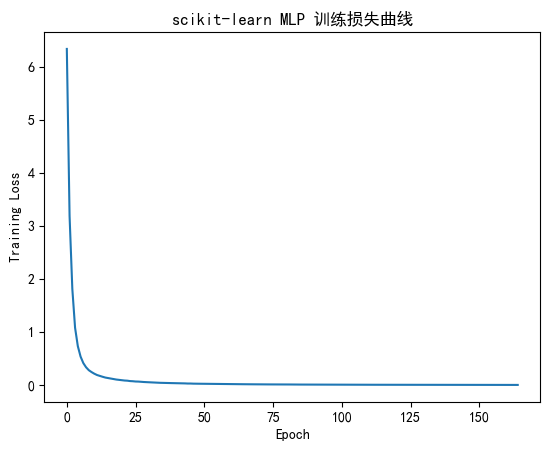

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载手写数字数据集(简化版 MNIST)
digits = load_digits()
X, y = digits.data, digits.target

# 数据预处理
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建 MLP 模型(单隐藏层,100个神经元)
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# 训练模型
mlp.fit(X_train, y_train)

# 预测与评估
y_pred = mlp.predict(X_test)
print("MLP 准确率:", accuracy_score(y_test, y_pred))

# 可视化训练损失曲线
import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('scikit-learn MLP 训练损失曲线')
plt.show()

## 2. 全连接神经网络(MNIST 分类)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8643 - loss: 0.4755 - val_accuracy: 0.9549 - val_loss: 0.1591
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9603 - loss: 0.1391 - val_accuracy: 0.9661 - val_loss: 0.1206
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9723 - loss: 0.0928 - val_accuracy: 0.9694 - val_loss: 0.1057
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9808 - loss: 0.0647 - val_accuracy: 0.9713 - val_loss: 0.0938
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9860 - loss: 0.0479 - val_accuracy: 0.9757 - val_loss: 0.0876
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0870
测试集准确率: 0.9771000146865845


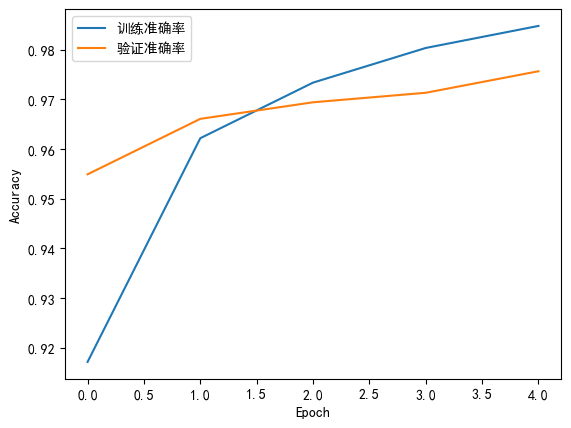

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

# 加载数据
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 构建模型
model = Sequential([
    Input(shape=(28, 28)),  # 显式指定输入形状
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print("测试集准确率:", test_acc)

# 可视化训练过程
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. 卷积神经网络(CNN)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.8978 - loss: 0.3407 - val_accuracy: 0.9775 - val_loss: 0.0738
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.9832 - loss: 0.0557 - val_accuracy: 0.9845 - val_loss: 0.0530
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9841 - val_loss: 0.0548
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.9927 - loss: 0.0211 - val_accuracy: 0.9855 - val_loss: 0.0530
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9963 - loss: 0.0132 - val_accuracy: 0.9857 - val_loss: 0.0546
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8799 - loss: 0.3934 - val_accuracy: 0.9762 - val_loss: 0.0809
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9719 - loss: 0.0904 - val_accuracy: 0.9812 - val_loss: 0.0645
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9806 - loss

100%|██████████| 9.91M/9.91M [00:00<00:00, 27.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 602kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.61MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.08MB/s]


Epoch 1, Loss: 0.1326
Epoch 2, Loss: 0.0416
Epoch 3, Loss: 0.0287
Epoch 4, Loss: 0.0201
Epoch 5, Loss: 0.0159


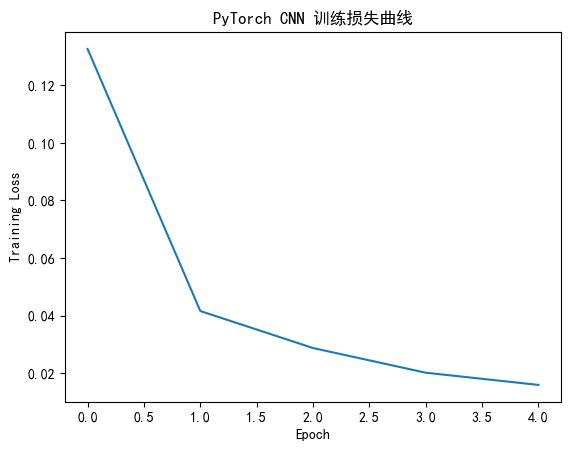

测试集准确率:98.75%


In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# 加载数据
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 构建 CNN 模型
model = Sequential([
    Input(shape=(28, 28, 1)),  # 显式指定输入形状
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# 正则化(Dropout 与早停)
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 构建 CNN 模型
model = Sequential([
    Input(shape=(28, 28, 1)),  # 显式指定输入形状
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),  # 随机丢弃 50%神经元
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 早停回调
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# 编译模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stop])

# 4. 使用 PyTorch 实现 CNN(进阶)
# 安装 PyTorch
# pip install torch torchvision

# PyTorch 实现 MNIST 分类
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载 MNIST 数据集
train_dataset = datasets.MNIST(root='./data', train=True,
                               download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False,
                              transform=transform)

# 创建数据加载器
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


# 定义 CNN 模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # 输出尺寸:(32,14, 14)
        x = self.pool(torch.relu(self.conv2(x)))  # 输出尺寸:(64, 7, 7)
        x = x.view(-1, 64 * 7 * 7)  # 展平
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# 初始化模型、损失函数和优化器
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
train_losses = []
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")

# 可视化训练损失
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('PyTorch CNN 训练损失曲线')
plt.show()

# 测试模型
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"测试集准确率:{100 * correct / total:.2f}%")